In [2058]:
import numpy as np
import matplotlib.pyplot as plt

In [2059]:
# modelling the arrival process

# per second converyor belt

conveyor1=1
# c1 uses the distribution that tells us how likely the time of the next arrival
# a random value. 
conveyor2=2/3

stationFailrate=0.01
stationmean=1/stationFailrate

In [2060]:
# Exponential Random Number Algorithm
def poisson_est(mean):
    r=np.exp(-mean)
    N=0.0
    s=1.0
    s*=np.random.random()
    while s>r:
        N+=1
        s*=np.random.random()
    else:
        return N

In [2061]:
# total number of entities conveyor1 delivers per second for 1000 seconds
c1sample=[poisson_est(1)  for i in range(1000)]


In [2062]:
# total entities conveyor belt delivers
totalc1=sum(c1sample)
totalc1

967.0

In [2063]:
def conveyor2(time):
    # number of entities conveyor2 delivers over a given time
    return (int(time/1.5))
conveyor2(1000)

666

In [2064]:
def failtime(frate,time):
    # per unit time
    time=time%100
    # cdf of failure 
    c_fail=1 - np.exp(-frate* time)
    if(c_fail>=np.random.random()):
        return time
    else: 
        return 0    

In [2065]:
def failnow(frate,time):
    # prob of failure in next second
    p_fail=frate*np.exp(-frate*0)+ frate*np.exp(-frate*1)

    if(p_fail>=np.random.random()):
        return time
    else: 
        return 0 

In [2066]:
f=np.array([failnow(0.01,time) for time in range(10000)])
(10000-sum(f==0)) /10000
# failtime=
f[f!=0]



array([  72,   85,  114,  202,  267,  277,  302,  320,  323,  347,  352,
        423,  664,  852,  879,  921,  989, 1028, 1097, 1125, 1137, 1153,
       1163, 1264, 1275, 1298, 1342, 1351, 1364, 1428, 1447, 1487, 1498,
       1513, 1568, 1619, 1650, 1676, 1767, 1769, 1782, 1795, 1940, 1977,
       1984, 2010, 2030, 2148, 2218, 2250, 2319, 2352, 2401, 2474, 2565,
       2633, 2666, 2702, 2713, 2742, 3024, 3048, 3114, 3308, 3314, 3323,
       3379, 3384, 3406, 3447, 3473, 3521, 3577, 3599, 3611, 3900, 3923,
       3992, 4011, 4088, 4114, 4151, 4172, 4235, 4296, 4329, 4337, 4549,
       4556, 4590, 4630, 4638, 4639, 4736, 4753, 4754, 4758, 4810, 4905,
       4911, 5020, 5047, 5049, 5132, 5143, 5199, 5224, 5248, 5260, 5307,
       5415, 5429, 5529, 5562, 5576, 5618, 5662, 5802, 5811, 5981, 6044,
       6115, 6124, 6138, 6140, 6143, 6160, 6178, 6269, 6303, 6467, 6474,
       6477, 6489, 6573, 6575, 6598, 6642, 6666, 6741, 6892, 6928, 6960,
       7137, 7179, 7192, 7199, 7229, 7346, 7452, 75

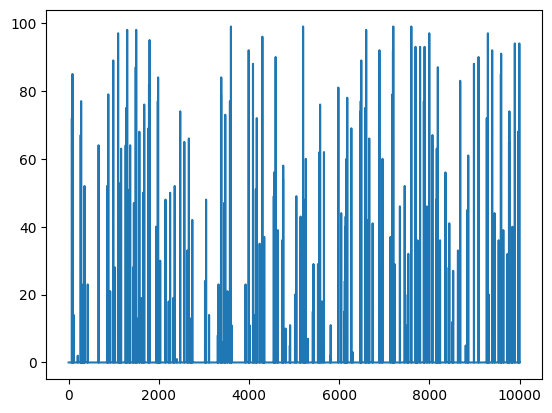

In [2067]:
f=f%100
plt.plot(np.arange(0,10000),f)

In [2068]:
# for each second, check the 
def simulate(time):
    C1event=[]
    stationFailures=[]
    completed=0
    downtime=0
    # stacks to count waiting entities at each conveyour belt C
    stackC1=[]
    stackC2=[]
    def stackpop(stackC1,stackC2):
        if stackC2[-1]==1:
            stackC2.pop()
        else:
            stackC2[-1]-=1 
        
        if stackC1[-1]==1:
            stackC1.pop() 
        else:
            stackC1[-1]==1
            
    def addtoC1(time_index,stackC1,C1event):
            if len(stackC1)==0:
                stackC1.append(C1event[time_index])
            else:
                stackC1.append(C1event[time_index]+stackC1[-1])

    # add a entity to the stack every 1.5 seconds
    def addtoC2(time_index,stackC2):
        if time_index%1.5==0:
            if len(stackC2)==0:
                stackC2.append(1)
            else:
                stackC2.append(stackC2[-1]+1)


# simulate events with respect to random variables
    for t in np.arange(time):
        C1event.append(poisson_est(1))
        stationFailures.append(failnow(0.01,t))

    for time_index in np.arange(time):
        
        addtoC1(time_index,stackC1,C1event)
        addtoC2(time_index,stackC2)

        # if both parts are ready
        if stackC1 and stackC2 and stackC1[-1]>0 and stackC2[-1]>0:
            # check if the machine is working
            if stationFailures[time_index]>0:
                for standyby in range(1,6):
                    curr=standyby+time_index
                    # conveyors run during downtime
                    addtoC1(curr,stackC1,C1event)
                    addtoC2(curr,stackC2)
                downtime+=5
                # machine fails close to the end of the testing time
                if time_index+5>=time-1:
                    return completed

                # count continues 5 seconds after
                time_index+=5
                stackpop(stackC1,stackC2)
            
                completed+=1
            else: #if the machine is working
                # do this or a while loop - while there are parts
                stackpop(stackC1,stackC2)
                completed+=1
        # print("\npost\nstackc2",stackC2,"\nstackc1",stackC1,'\ntime',time_index,'\n',completed,'\n\n')
    return completed,downtime



In [2069]:
simulate(100)

(34, 0)

In [2070]:
# will station1 do all work available instantly or one per unit time, while loop or one per iteration
# can parts + downtime> total time
# end behavior, produce or no

